# Numpy Cookbook

## Introduction

There are plenty high level tools which try to simplify life of ML practitioner, but if you want to go deeper, you won't pass by Numpy library. It does exactly what each ML practitioner needs: efficient operations with multidimensional arrays. Recently I dedicated some free time to understand this great library. Here are notes with solutions of most common problems organized in easy for search way. Most information taken from: [ this Numpy cheat sheet](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet), [this blog](https://www.machinelearningplus.com/python/101-numpy-exercises-python/), and [this Github project](https://github.com/rougier/numpy-100)

I left my solutions in some exercises with accompanying performance checks


In [1]:
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
from time import time
import timeit, functools
from timeit import default_timer as timer

## Creating Arrays

### Create array of zeros

In [2]:
print(np.zeros((3,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Create array of ones

In [3]:
print(np.ones((3,5), dtype=np.int16))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


### Create evenly spaced array with step

In [4]:
np.arange(10,26,5)

array([10, 15, 20, 25])

In [5]:
#without knowing max number
np.arange(5,5+3*10,3)

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

### Create evenly spaced array within interval

In [6]:
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

### Create array of dates

#### Create array of continuous dates

In [7]:
print(np.arange('2018-02-01', '2018-02-25', dtype='datetime64[D]'))

['2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24']


#### Fill in non-continuous array of dates

In [8]:
#fill in non-continuous array of dates
dates = np.arange(np.datetime64('2018-02-01'), np.datetime64('2018-02-25'), 2)
print(dates)


#Solution 1
filled_in = np.array([np.arange(date, (date+d)) for date, d in zip(dates, np.diff(dates))]).reshape(-1)
# add the last day
output = np.hstack([filled_in, dates[-1]])
print(output)



#Solution 2
out = []
for date, d in zip(dates, np.diff(dates)):
    out.append(np.arange(date, (date+d)))

filled_in = np.array(out).reshape(-1)
# add the last day
output = np.hstack([filled_in, dates[-1]])
print(output)



['2018-02-01' '2018-02-03' '2018-02-05' '2018-02-07' '2018-02-09'
 '2018-02-11' '2018-02-13' '2018-02-15' '2018-02-17' '2018-02-19'
 '2018-02-21' '2018-02-23']
['2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23']
['2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23']


### Create 2d array with strides

In [20]:
arr = np.arange(10) 
print(arr)

#My Solution
def strides(arr, stride=2, window_size=5):
  result = [arr[idx:idx+window_size] for idx in range(0,arr.size)]
  return np.vstack([arr for arr in result if arr.size==window_size][::stride])

print(strides(arr))


#Solution 
def gen_strides(a, stride_len=2, window_len=5):
    n_strides = ((a.size-window_len)//stride_len) + 1
    # return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])
    return np.array([a[s:(s+window_len)] for s in np.arange(0, n_strides*stride_len, stride_len)])

print(gen_strides(arr))



#Performance check:
arr = np.arange(150000)
print(f'My solution: {timeit.Timer(functools.partial(strides, arr)).timeit(1)}')
print(f'Provided solution: {timeit.Timer(functools.partial(gen_strides, arr)).timeit(1)}')


[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [2 3 4 5 6]
 [4 5 6 7 8]]
[[0 1 2 3 4]
 [2 3 4 5 6]
 [4 5 6 7 8]]
My solution: 0.16927025699988008
Provided solution: 0.10531749700021464


### Create array with same pattern

In [21]:
print(np.repeat(1, 10))
print(np.tile([1,2,3], 3))
print(np.tile(np.zeros((2,2)), 3))
print(np.full((3,4), 7))

[1 1 1 1 1 1 1 1 1 1]
[1 2 3 1 2 3 1 2 3]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]


### Create identity matrix

In [22]:
#Identity matrix
np.eye(5, 7, k=-1)

array([[0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

### Create random matrix

In [23]:
np.random.random((3,3))

array([[0.30913645, 0.75480161, 0.73382444],
       [0.53709946, 0.94664194, 0.18597993],
       [0.84795433, 0.43072325, 0.69944325]])

In [24]:
np.random.uniform(1,20, (5,4))

array([[ 2.46865489, 17.07787   ,  3.9571413 ,  8.88442921],
       [15.12735442, 18.70432535,  9.73090184, 10.4819873 ],
       [16.6300767 ,  6.50213623,  7.99595517,  3.22333733],
       [ 1.85874006, 12.9207061 ,  9.27536504, 10.78309195],
       [ 1.74181118, 12.13090583, 14.45547078, 10.4871087 ]])

In [25]:
np.random.randint(1,10, (5,2))

array([[6, 4],
       [7, 7],
       [1, 8],
       [1, 2],
       [7, 2]])

### Create empty matrix

In [26]:
#Empty Array
np.empty((3,4))

array([[3.5e-323, 3.5e-323, 3.5e-323, 3.5e-323],
       [3.5e-323, 3.5e-323, 3.5e-323, 3.5e-323],
       [3.5e-323, 3.5e-323, 3.5e-323, 3.5e-323]])

### Create diagonal matrix

In [28]:
a = np.random.randint(1,10,(5,5))
print(a)
print(a.diagonal())
print(np.diag(a.diagonal()))

[[8 2 1 4 8]
 [9 1 1 8 3]
 [7 3 2 3 7]
 [7 2 3 9 3]
 [7 1 7 7 1]]
[8 1 2 9 1]
[[8 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 9 0]
 [0 0 0 0 1]]


### Create record array

In [29]:
Z = np.array([("Hello", 2.5, 3),
              ("World", 3.6, 2)])
R = np.core.records.fromarrays(Z.T,
                               names='col1, col2, col3',
                               formats = 'S8, f8, i8')
print(R.col1)
print(R.col1.dtype)

[b'Hello' b'World']
|S8


## Array Slicing

### Get Row

In [ ]:
#Second row
a = np.arange(1,16,1).reshape(3,5)
a[1]

array([ 6,  7,  8,  9, 10])

### Get Column of a Row

In [ ]:
#Second row, third value
a = np.arange(1,16,1).reshape(3,5)
a[1,2]

8

### Get mulitple rows

In [ ]:
#Two rows from start
a = np.arange(1,16,1).reshape(3,5)
a[:2]

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

### Get whole Column

In [ ]:
#Second value of each row
a = np.arange(1,16,1).reshape(3,5)
print(a)
a[:2,1]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


array([2, 7])

### Get everthing from starting point

In [ ]:
a = np.arange(1,16,1).reshape(3,5)
print(a)
a[1,...]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


array([ 6,  7,  8,  9, 10])

### Reverse

#### Reverse columns

In [ ]:
#revers columns
a = np.arange(1,16,1).reshape(3,5)
print(a)
print(a.T[::-1].T)
print(a[:,::-1])
print(np.fliplr(a))


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[ 5  4  3  2  1]
 [10  9  8  7  6]
 [15 14 13 12 11]]
[[ 5  4  3  2  1]
 [10  9  8  7  6]
 [15 14 13 12 11]]
[[ 5  4  3  2  1]
 [10  9  8  7  6]
 [15 14 13 12 11]]


#### Reverse rows

In [ ]:
#revers rows
a = np.arange(1,16,1).reshape(3,5)
print(a)
print(a[: :-1])
print(np.flipud(a))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[11 12 13 14 15]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]]
[[11 12 13 14 15]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]]


### Filter based on condition

In [ ]:
#one condition
a = np.array([2, 6, 1, 9, 10, 3, 27])
a[a<10]

array([2, 6, 1, 9, 3])

In [ ]:
#multiple conditions
a = np.array([2, 6, 1, 9, 10, 3, 27])
print(a[(a<=10)&(a>=5)])

[ 6  9 10]


In [ ]:
#multiple conditions indexes
a = np.array([2, 6, 1, 9, 10, 3, 27])
print(np.where((a >= 5) & (a <= 10)))
print(np.where(np.logical_and(a>=5, a<=10)))

(array([1, 3, 4]),)
(array([1, 3, 4]),)


In [ ]:
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
         [[9, 8], [7, 6]])

array([[1, 8],
       [3, 4]])

In [ ]:
 #First array is row indexes, second corresponding column indexes
b = np.arange(20).reshape(5,-1)
 b[[1, 0, 1, 0],[0, 1, 2, 0]]

array([4, 1, 6, 0])

In [ ]:
 #First array of row indexes, second sequence of indexes in provided row
b = np.arange(20).reshape(5,-1)
 b[[1, 0, 1, 0]][:,[0,1,2,0]] 

array([[4, 5, 6, 4],
       [0, 1, 2, 0],
       [4, 5, 6, 4],
       [0, 1, 2, 0]])

### Get unique

#### Unique values 1d array

In [ ]:
#extract unique values from column
iris = np.genfromtxt(url, delimiter=',', dtype='object',
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'))
#My solution
print(set(iris['species']))
#Solution 
print(np.unique(iris['species']))


#Performance check
a = np.random.randint(1,100,100000)
%timeit set(a)
%timeit np.unique(a)

{b'Iris-versicolor', b'Iris-setosa', b'Iris-virginica'}
[b'Iris-setosa' b'Iris-versicolor' b'Iris-virginica']
100 loops, best of 3: 12.7 ms per loop
100 loops, best of 3: 4.71 ms per loop


#### Unique rows 2d array

In [ ]:
a = np.random.randint(1,3,(10,3))
print(a)
np.unique(a,axis=0)

[[1 2 2]
 [1 1 2]
 [1 2 1]
 [2 1 2]
 [2 2 2]
 [2 2 1]
 [1 1 1]
 [2 2 1]
 [2 1 2]
 [2 1 2]]


array([[1, 1, 1],
       [1, 1, 2],
       [1, 2, 1],
       [1, 2, 2],
       [2, 1, 2],
       [2, 2, 1],
       [2, 2, 2]])

## Array Arithmetics

### Subtract

In [35]:
#Subtract
a = np.full((3,3), 10)
b = np.full((3,3), 8)
print(a-b)
print(np.subtract(a,b))



#Performance check
a = np.full((30000,3000), 10)
b = np.full((30000,3000), 8)

%timeit a-b
%timeit np.subtract(a,b)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]
1 loop, best of 3: 185 ms per loop
10 loops, best of 3: 186 ms per loop


#### Subtract 1d array from 2d array

In [37]:
a_2d = np.array([[3,3,3],[5,5,5],[8,8,8]])
b_1d = np.array([1,2,3])

a_2d-b_1d[:,None]

array([[2, 2, 2],
       [3, 3, 3],
       [5, 5, 5]])

### Addition

In [38]:
a = np.full((3,3), 10)
b = np.full((3,3), 8)
print(a+b)
print(np.add(a,b))

[[18 18 18]
 [18 18 18]
 [18 18 18]]
[[18 18 18]
 [18 18 18]
 [18 18 18]]


### Division

In [39]:
a = np.full((3,3), 10)
b = np.full((3,3), 8)
print(a/b)
print(np.divide(a,b))

[[1.25 1.25 1.25]
 [1.25 1.25 1.25]
 [1.25 1.25 1.25]]
[[1.25 1.25 1.25]
 [1.25 1.25 1.25]
 [1.25 1.25 1.25]]


### Multiplication

In [40]:
a = np.full((3,3), 10)
b = np.full((3,3), 8)
print(a*b)
print(np.multiply(a,b))

[[80 80 80]
 [80 80 80]
 [80 80 80]]
[[80 80 80]
 [80 80 80]
 [80 80 80]]


#### Multiply arrays of different shapes

In [45]:
a = np.random.choice(100,(5,5,3))
b = np.random.choice(10, (5,5))

#My solution
print(a*b.reshape(5,5,1))
#Solution
print(a * b[:,:,None])


a = np.random.choice(100,(50,50,50, 3))
b = np.random.choice(10, (50,50))
#performance check
%timeit a*b.reshape(50,50,1,1)
%timeit a*b[:,:,None]

[[[584 672 200]
  [  0   0   0]
  [  6  37  72]
  [873 801  72]
  [154 172 108]]

 [[ 78   4  10]
  [256 432 680]
  [ 30  20 205]
  [  0   0   0]
  [392  48 392]]

 [[ 49 602 588]
  [228 270 468]
  [270 180 468]
  [ 16 292  20]
  [ 47  15  12]]

 [[567 462 161]
  [  0   0   0]
  [ 13  67  21]
  [224  64 448]
  [ 18  84  93]]

 [[ 63  84 294]
  [ 31  31  87]
  [ 24 736 504]
  [ 66  17  60]
  [160 544 368]]]
[[[584 672 200]
  [  0   0   0]
  [  6  37  72]
  [873 801  72]
  [154 172 108]]

 [[ 78   4  10]
  [256 432 680]
  [ 30  20 205]
  [  0   0   0]
  [392  48 392]]

 [[ 49 602 588]
  [228 270 468]
  [270 180 468]
  [ 16 292  20]
  [ 47  15  12]]

 [[567 462 161]
  [  0   0   0]
  [ 13  67  21]
  [224  64 448]
  [ 18  84  93]]

 [[ 63  84 294]
  [ 31  31  87]
  [ 24 736 504]
  [ 66  17  60]
  [160 544 368]]]
1000 loops, best of 3: 722 µs per loop
1000 loops, best of 3: 1.38 ms per loop


### Exponentiation

In [46]:
a = np.full((3,3), 10)
np.exp(a)

array([[22026.46579481, 22026.46579481, 22026.46579481],
       [22026.46579481, 22026.46579481, 22026.46579481],
       [22026.46579481, 22026.46579481, 22026.46579481]])

### Square root

In [47]:
a = np.full((3,3), 10)
np.sqrt(a)

array([[3.16227766, 3.16227766, 3.16227766],
       [3.16227766, 3.16227766, 3.16227766],
       [3.16227766, 3.16227766, 3.16227766]])

### Element-wise sine

In [52]:
#Sine fo array
a = np.random.random((3,3))
print(a)
np.sin(a)

[[0.54810641 0.53649427 0.08115869]
 [0.21122052 0.57307665 0.521753  ]
 [0.30916075 0.43885164 0.33498246]]


array([[0.52107196, 0.51112595, 0.08106962],
       [0.20965345, 0.54221972, 0.49840066],
       [0.30425929, 0.42490021, 0.3287526 ]])

### Element-wise cosine

In [53]:
a = np.random.random((3,3))
print(a)
np.cos(a)

[[0.87384561 0.71039239 0.87013256]
 [0.74923447 0.67131897 0.72874423]
 [0.76324583 0.91583245 0.06649993]]


array([[0.64188248, 0.75810604, 0.64472522],
       [0.73221047, 0.78300192, 0.74601125],
       [0.72259607, 0.6091306 , 0.99778969]])

### Element-wise natural logarithm

In [54]:
a = np.random.random((3,3))
print(a)
np.log(a)

[[0.49648226 0.45563457 0.82336407]
 [0.00400876 0.1804414  0.94879918]
 [0.02911362 0.4687666  0.46228203]]


array([[-0.70020753, -0.78606417, -0.19435681],
       [-5.51927411, -1.71234923, -0.05255811],
       [-3.5365493 , -0.75765029, -0.77158012]])

### Dot product

In [55]:
#Dot product
a = np.full((3,3), 10)
b = np.full((3,3), 8)
a.dot(b)

array([[240, 240, 240],
       [240, 240, 240],
       [240, 240, 240]])

### Normalize

In [59]:
#normalize single column
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
spl = iris[:,0]
vmax = np.max(spl)
vmin = np.min(spl)

#Solution 1
print(((spl-vmin)/(vmax-vmin))[:10])
#Solution 2
print(((spl-vmin)/spl.ptp())[:10])



#performance check
%timeit (spl-vmin)/(vmax-vmin)
%timeit (spl-vmin)/spl.ptp()

[0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
 0.08333333 0.19444444 0.02777778 0.16666667]
[0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
 0.08333333 0.19444444 0.02777778 0.16666667]
The slowest run took 5.59 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.16 µs per loop
The slowest run took 8.64 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.65 µs per loop


### Percentile

In [61]:
#percentile
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
sepallength = iris[:,0]
def percentile(prs,arr):
  return np.sort(arr)[round((prs/100)*len(arr))]
print(percentile(5,sepallength))
print(percentile(95,sepallength))
print(np.percentile(sepallength, q=[5, 95]))

4.6
7.3
[4.6   7.255]


#### Percentile of means

In [62]:
# Author: Jessica B. Hamrick
X = np.random.randn(100) # random 1D array
N = 100 # number of bootstrap samples
idx = np.random.randint(0, X.size, (N, X.size))
means = X[idx].mean(axis=1)
confint = np.percentile(means, [2.5, 97.5])
print(confint)
print(means[means>confint[1]])

[-0.0360518   0.32008763]
[0.33514479 0.3231043  0.35789447]


### Logical not

In [65]:
Z = np.random.randint(0,5,10)
print(Z)

#Solution 1
np.logical_not(Z, out=Z)
print(Z)

#Solution 2
np.negative(Z, out=Z)
print(Z)

[1 3 0 2 1 0 3 2 4 0]
[0 0 1 0 0 1 0 0 0 1]
[ 0  0 -1  0  0 -1  0  0  0 -1]


### Power

In [66]:
a = np.random.rand(int(5e6))
print(len(a))

%timeit [i**3 for i in a]
%timeit np.power(a,3)
%timeit a**3
%timeit a*a*a
%timeit np.einsum('i,i,i->i',a,a,a)

5000000
1 loop, best of 3: 2.68 s per loop
1 loop, best of 3: 371 ms per loop
1 loop, best of 3: 373 ms per loop
100 loops, best of 3: 15.5 ms per loop
100 loops, best of 3: 14.2 ms per loop


## Array Comparison

### Element-wise comparison

In [67]:
#Elementwise comparison
a = np.zeros((3,3))
b = np.eye(3)
print(a == b)
print(a<b)

[[False  True  True]
 [ True False  True]
 [ True  True False]]
[[ True False False]
 [False  True False]
 [False False  True]]


### Array-wise comparison

In [68]:
#Arraywise comparison
a = np.zeros((3,3))
b = np.eye(3)
np.array_equal(a,b)

False

### Common elements of two arrays

#### List of common elements without duplications

In [69]:
#List of common elements without duplications
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
np.intersect1d(a,b)

array([2, 4])

#### Indexes of common elements

In [70]:
#indexes of common elements
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
np.where(a==b)

(array([1, 3, 5, 7]),)

#### Remove all common elements from two arrays

In [71]:
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

# From 'a' remove all of 'b'
np.setdiff1d(a,b)

array([1, 2, 3, 4])

#### Common elements of Nd arrays

In [72]:
# Author: Gabe Schwartz
np.random.seed(101)
A = np.random.randint(0,5,(8,3))
print(A)
B = np.random.randint(0,5,(2,2))
print(B)
C = (A[..., np.newaxis, np.newaxis] == B)
rows = np.where(C.any((3,1)).all(1))[0]
print(rows)

[[3 1 3]
 [1 0 4]
 [0 4 4]
 [0 4 0]
 [1 3 2]
 [0 3 3]
 [3 2 4]
 [0 1 3]]
[[2 4]
 [3 0]]
[1 2 3 4 6]


### Count elements of array

#### Count ints

In [73]:
a = np.random.randint(0,8,10)
print(a)
b = np.bincount(a)
print(b)

#Recreate elements of a from b
np.repeat(np.arange(b.size),b)

[1 7 1 7 0 6 4 3 3 4]
[1 2 0 2 2 0 1 2]


array([0, 1, 1, 3, 3, 4, 4, 6, 7, 7])

#### Mark all duplicates in 1d array

In [75]:
#Mark as True all duplicates except first one
np.random.seed(100)
a = np.random.randint(0, 5, 10)
print(a)

#Solution
# Create an all True array
out = np.full(a.shape[0], True)
# Find the index positions of unique elements
unique_positions = np.unique(a, return_index=True)[1]
# Mark those positions as False
out[unique_positions] = False
print(out)

[0 0 3 0 2 4 2 2 2 2]
[False  True False  True False False  True  True  True  True]


#### Index of n-appearence item in array

In [76]:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])
n = 5

#My solution
print(np.argwhere(x==1)[n-1][0])

# Solution 1: List comprehension
print([i for i, v in enumerate(x) if v == 1][n-1])

# Solution 2: Numpy version
print(np.where(x == 1)[0][n-1])

#performance check
%timeit np.argwhere(x==1)[n-1][0]
%timeit [i for i, v in enumerate(x) if v == 1][n-1]
%timeit np.where(x == 1)[0][n-1]

8
8
8
The slowest run took 7.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.64 µs per loop
100000 loops, best of 3: 5.24 µs per loop
The slowest run took 19.28 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.03 µs per loop


#### Duplicates in nested array

In [77]:
a = np.random.randint(1,3,(5,2))
print(a)
b = a.view( dtype=[('p0',a.dtype),('p1',a.dtype)] )
print(np.unique(b))


[[2 1]
 [1 2]
 [1 2]
 [1 1]
 [1 2]]
[(1, 1) (1, 2) (2, 1)]


## Array Aggregation

###Sum

#### Sum 1d array

In [78]:
a = np.linspace(1,10,10)
print(a)
a.sum()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


55.0

#### Sum by axis

In [79]:
a = np.random.randint(1,5,(5,5))
print(a)
a.sum(axis=0)

[[2 2 3 3 4]
 [1 1 4 2 2]
 [2 4 1 1 4]
 [4 4 4 2 4]
 [2 2 3 4 4]]


array([11, 13, 15, 12, 18])

#### Block sum of 2d array

In [80]:
# Author: Robert Kern
Z = np.ones((16,16))
k = 4
print(Z)
print(np.arange(0, Z.shape[0], k))
print(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0))
S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                                       np.arange(0, Z.shape[1], k), axis=1)
print(S)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[ 0  4  8 12]
[[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.

#### Row sum by condition

In [81]:
#Return only integer rows with sum == 4
X = np.asarray([[1.0, 0.0, 3.0, 8.0],
                [2.0, 0.0, 1.0, 1.0],
                [1.5, 2.5, 1.0, 0.0]])
n = 4

#My solution
result = X[(X.sum(axis=1)==n)&(np.all((X[:]==X[:].astype(int)),axis=1))]
print(result)

# Author: Evgeni Burovski
#Solution
def row_sum(X):
  M = np.logical_and.reduce(np.mod(X, 1) == 0, axis=-1)
  M &= (X.sum(axis=-1) == n)
  return X[M]


#performance check
%timeit X[(X.sum(axis=1)==n)&(np.all((X[:]==X[:].astype(int)),axis=1))]
print(f'Solution: {timeit.Timer(functools.partial(row_sum, X)).timeit(1)}')

[[2. 0. 1. 1.]]
The slowest run took 10.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.8 µs per loop
Solution: 6.930399831617251e-05


#### Cumulative sum along the axis

In [82]:
#Cumulative sum along the axis
b = np.random.randint(1,10, [5,3])
print(b)
b.cumsum(axis=1)

[[1 3 4]
 [3 6 9]
 [2 1 8]
 [7 3 1]
 [9 3 6]]


array([[ 1,  4,  8],
       [ 3,  9, 18],
       [ 2,  3, 11],
       [ 7, 10, 11],
       [ 9, 12, 18]])

### Minimum

In [83]:
a = np.linspace(1,10,10)
print(a)
a.min()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


1.0

### Mean

#### Array mean

In [84]:
a = np.linspace(1,10,10)
print(a)
a.mean()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


5.5

#### Moving average

In [85]:
np.random.seed(100)
a = np.random.randint(10, size=10)
print(a)

#My solution
def moving_avg(arr,window_size=3):
  return [np.mean(arr[idx-window_size:idx]) for idx in range(window_size, len(arr)+1)]   
print(moving_avg(a))

#Solution 1
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
print(moving_average(a))

#Solution 2
# np.ones(3)/3 gives equal weights. Use np.ones(4)/4 for window size 4.
#convolution over input array which returns dot product
def conv_m_avg(arr, n=3):
  return np.convolve(arr,np.ones(n)/n, mode='valid')
print(conv_m_avg(a))

arr = np.random.randint(10000, size=100000)
print(f'My Solution: {timeit.Timer(functools.partial(moving_avg, arr)).timeit(1)}')
print(f'Solution 1: {timeit.Timer(functools.partial(moving_average, arr)).timeit(1)}')
print(f'Solution 2: {timeit.Timer(functools.partial(conv_m_avg, arr)).timeit(1)}')

[8 8 3 7 7 0 4 2 5 2]
[6.333333333333333, 6.0, 5.666666666666667, 4.666666666666667, 3.6666666666666665, 2.0, 3.6666666666666665, 3.0]
[6.33333333 6.         5.66666667 4.66666667 3.66666667 2.
 3.66666667 3.        ]
[6.33333333 6.         5.66666667 4.66666667 3.66666667 2.
 3.66666667 3.        ]
My Solution: 0.7868234430006851
Solution 1: 0.0016306739998981357
Solution 2: 0.0005510070004675072


### Median

In [86]:
a = np.random.randint(10, size=10)
print(a)
np.median(a)

[8 1 0 4 1 6 0 7 4 0]


2.5

### Max value

#### Max value by axis

In [87]:
#Max value by axis
b = np.random.randint(1,10, [5,3])
print(b)
#My solution
print(b.max(axis=1))
# Solution 1
print(np.amax(b, axis=1))
# Solution 2
print(np.apply_along_axis(np.max, arr=b, axis=1))

[[6 4 2]
 [8 6 2]
 [7 5 1]
 [5 7 5]
 [3 3 1]]
[6 8 7 7 3]
[6 8 7 7 3]
[6 8 7 7 3]


#### Max of two arrays

In [88]:
#get maximum over two arrays
a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])
np.where(a>b,a,b)

array([6, 7, 9, 8, 9, 7, 5])

#### N-max value in column

In [89]:
#Select second biggest value of column
iris = np.genfromtxt(url, delimiter=',', dtype='object')
#Solution 1
m = np.unique(np.sort(iris[iris[:,4] == b'Iris-setosa'][:,2]))[-2]
print(m)
#Solution 2
m = np.unique(np.sort(iris[iris[:,4] == b'Iris-setosa', [2]]))[-2]
print(m)

b'1.7'
b'1.7'


#### Indexes of max elements

In [90]:
#positions of max elements
a = np.random.uniform(1,50, 20)
print(a)
print(np.sort(a))
#Solution 1
print(np.argsort(a)[-5:])
#Solution 2
print(np.argpartition(-a, 5)[:5])

[47.80205536 43.61802577  8.99581766 24.5690574  40.83739417 21.43305397
 13.37640359 42.26089515  7.02326593 45.00091991  3.66097077 18.39334337
 28.7549859   4.80371436  9.80448034 44.46304001  6.89627634 34.22839039
 26.1984507  38.46005823]
[ 3.66097077  4.80371436  6.89627634  7.02326593  8.99581766  9.80448034
 13.37640359 18.39334337 21.43305397 24.5690574  26.1984507  28.7549859
 34.22839039 38.46005823 40.83739417 42.26089515 43.61802577 44.46304001
 45.00091991 47.80205536]
[ 7  1 15  9  0]
[ 0  9 15  1  7]


#### All local maxima of array

In [91]:
a = np.random.choice(10, 10)

#a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
print(a)
#My Solution
def local_max(a):
  return [idx for idx in range(1,len(a)-1) if np.max([a[idx-1],a[idx],a[idx+1]])==a[idx] and len(np.unique([a[idx-1],a[idx],a[idx+1]]))>1]
print(local_max(a))

#Solution. This solution will not work for cases with peak plato: [7 0 3 4 5 6 6 2 1 9]
def local_maxima(a):
  doublediff = np.diff(np.sign(np.diff(a)))
  return np.where(doublediff == -2)[0] + 1
print(local_maxima(a))

arr= np.random.choice(1000, 10000)
print(f'My Solution: {timeit.Timer(functools.partial(local_max, arr)).timeit(1)}')
print(f'Solution 1: {timeit.Timer(functools.partial(local_maxima, arr)).timeit(1)}')

[1 4 7 7 9 1 6 4 0 2]
[2, 4, 6]
[4 6]
My Solution: 0.1297242410000763
Solution 1: 0.000561041000764817


#### Min-by-Max

In [92]:
b = np.random.randint(1,10, [5,3])
print(b)
np.apply_along_axis(lambda x: np.min(x)/np.max(x), arr=b, axis=1)

[[5 3 4]
 [6 7 2]
 [1 5 6]
 [5 6 4]
 [5 2 1]]


array([0.6       , 0.28571429, 0.16666667, 0.66666667, 0.2       ])

### Standart deviation

In [93]:
#Standart deviation
b = np.random.randint(1,10, [5,3])
print(b)
np.std(a)

[[2 5 3]
 [5 2 5]
 [3 5 1]
 [9 2 8]
 [4 9 9]]


2.9137604568666933

### Sort

#### Sort by column

In [95]:
#sort by column
#Solution 1
iris = np.genfromtxt(url, delimiter=',', dtype='object', names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'))
np.sort(iris, order='sepallength')
#Solution 2
iris = np.genfromtxt(url, delimiter=',', dtype='object')
iris[iris[:,0].argsort()][:10]

array([[b'4.3', b'3.0', b'1.1', b'0.1', b'Iris-setosa'],
       [b'4.4', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.4', b'3.0', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.4', b'2.9', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.5', b'2.3', b'1.3', b'0.3', b'Iris-setosa'],
       [b'4.6', b'3.6', b'1.0', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.4', b'1.4', b'0.3', b'Iris-setosa'],
       [b'4.6', b'3.2', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa']], dtype=object)

### Most frequent value

In [96]:
iris = np.genfromtxt(url, delimiter=',', dtype='object')
values, counts = np.unique(iris[:, 2], return_counts=True)
print(values[np.argmax(counts)])

#np.bincounts works for integers
#np.bincount(Z).argmax()

b'1.5'


### First occurrence

In [98]:
np.argwhere(iris[:,3] > b'1.0')[0]
#or
np.argwhere(iris[:, 3].astype(float) > 1.0)[0]

array([50])

### Grouping

#### Group indexing

In [99]:
#index rows of the same group
species = np.genfromtxt(url, delimiter=',', dtype='str', usecols=4)
species_small = np.sort(np.random.choice(species, size=20))
print(species_small)

#My solution
def group_idxs(arr):
  uniq, counts = np.unique(arr, return_counts=True)
  return np.concatenate([np.arange(item) for item in counts])

#Solution
def group_indexes(arr):
  return [i for val in np.unique(species_small) for i, grp in enumerate(species_small[species_small==val])]


arr = np.sort(np.random.choice(1000, 10000))
print(f'My Solution: {timeit.Timer(functools.partial(group_idxs, arr)).timeit(1)}')
print(f'Solution 1: {timeit.Timer(functools.partial(group_indexes, arr)).timeit(1)}')



['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']
My Solution: 0.0025953050007956335
Solution 1: 0.00010983700121869333


#### Index by category

In [100]:
#Encode categorical variable to the same id
species = np.genfromtxt(url, delimiter=',', dtype='str', usecols=4)
species_small = np.sort(np.random.choice(species, size=20))
print(species_small)

#My solution
def idx_by_category(arr):
  values, counts = np.unique(arr, return_counts=True)
  return np.array(np.repeat([i for i, value in enumerate(counts)], counts))
print(idx_by_category(species_small))

#Solution 1
def idx_by_category_1(arr):
  return [np.argwhere(np.unique(arr) == s).tolist()[0][0] for val in np.unique(arr) for s in arr[arr==val]]
print(idx_by_category_1(species_small))

#Solution 2
def idx_by_category_2(arr):
  output = []
  uniqs = np.unique(arr)
  for val in uniqs:  # uniq values in group
      for s in arr[arr==val]:  # each element in group
          output.append(np.argwhere(uniqs == s).tolist()[0][0])  # groupid
  return output
print(idx_by_category_2(species_small))

arr = np.sort(np.random.choice(1000, 10000))
print(f'My Solution: {timeit.Timer(functools.partial(idx_by_category, arr)).timeit(1)}')
print(f'Solution 1: {timeit.Timer(functools.partial(idx_by_category_1, arr)).timeit(1)}')
print(f'Solution 2: {timeit.Timer(functools.partial(idx_by_category_2, arr)).timeit(1)}')

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
My Solution: 0.0006219700007932261
Solution 1: 2.1093230820006283
Solution 2: 0.116008476999923


#### Group mean

In [102]:
iris = np.genfromtxt(url, delimiter=',', dtype='object', names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'))

#My Solution
result = [[s, np.mean(iris[iris['species']==s]['sepalwidth'].astype(float))] for s in np.unique(iris['species'])]
print(result)

# Solution 
numeric_column = iris['sepalwidth'].astype('float')  # sepalwidth
grouping_column = iris['species']  # species

# List comprehension version
result = [[group_val, numeric_column[grouping_column==group_val].mean()] for group_val in np.unique(grouping_column)]
print(result)

#performance check
%timeit  [[s, np.mean(iris[iris['species']==s]['sepalwidth'].astype(float))] for s in np.unique(iris['species'])]
%timeit [[group_val, numeric_column[grouping_column==group_val].mean()] for group_val in np.unique(grouping_column)]

[[b'Iris-setosa', 3.418], [b'Iris-versicolor', 2.7700000000000005], [b'Iris-virginica', 2.974]]
[[b'Iris-setosa', 3.418], [b'Iris-versicolor', 2.7700000000000005], [b'Iris-virginica', 2.974]]
1000 loops, best of 3: 159 µs per loop
10000 loops, best of 3: 85.5 µs per loop


## Array Manipulation

### Transpose matrix

In [118]:
#Array Transpose
a = np.arange(1,16,1).reshape(3,5)
print(a)
print(np.transpose(a))
print(a.T)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]
[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


### Flatten array

In [119]:
#Array flattening
a = np.arange(1,16,1).reshape(3,5)
b = a.ravel() # return a view of array
print(b)
b = a.flatten() #returns a copy of an array
print(b)
print(a.reshape(15)) #automatically decide about number of columns

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


### Flatten nested array

In [120]:
#Flatten nested array
arr1 = np.arange(3)
arr2 = np.arange(3,7)
arr3 = np.arange(7,10)

array_of_arrays = np.array([arr1, arr2, arr3])
#Solution 1
print(np.array([a for arr in array_of_arrays for a in arr]))
#Solution 2
print(np.concatenate(array_of_arrays))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Resize

In [121]:
#Resize extends the original array with copy
a = np.arange(1,16,1).reshape(3,5)
a = np.resize(a,(10,6))
print(a)
print(a.shape)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15  1  2  3]
 [ 4  5  6  7  8  9]
 [10 11 12 13 14 15]
 [ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15  1  2  3]
 [ 4  5  6  7  8  9]
 [10 11 12 13 14 15]]
(10, 6)


#### Resize with pattern

In [122]:
a = np.array([1,2,3])
np.r_[np.repeat(a, 3), np.tile(a, 3)]

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

#### Add new column based on existing columns

In [123]:
iris = np.genfromtxt(url, delimiter=',', dtype='object')
pl = iris[:,2].astype('float')
sl = iris[:,0].astype('float')
v_col =  (np.pi*pl*sl**2)/3
v_col = v_col[:, np.newaxis]
print(iris.shape)
new_iris = np.hstack([iris,v_col.astype('object')])
print(new_iris.shape)

(150, 5)
(150, 6)


### Append

In [124]:
#Append to original array
a = np.array([1,2,3])
b = np.zeros((2,2))
np.append(a,b)

array([1., 2., 3., 0., 0., 0., 0.])

### Insert

#### Insert by index

In [125]:
a = np.array([1,2,3])
print(a)
c = np.insert(a, 1, 5)
print(c)

[1 2 3]
[1 5 2 3]


#### Insert by condition

In [126]:
#Insert values based on condition
a = np.arange(0,10,1)
a[a%2==1] = -1
print(a)


[ 0 -1  2 -1  4 -1  6 -1  8 -1]


In [128]:
#Another way
a = np.arange(0,10,1)
np.where(a%2==1, -1, a)

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

#### Insert randomly

In [130]:
# put 20 nan values randomly and return their indexes

#Case 1, when type of array is float:
iris = np.genfromtxt(url, delimiter=',', usecols=[0,1,2,3])
i, j = np.where(iris)
iris[np.random.choice((i), 20), np.random.choice((j), 20)] = np.nan

print(np.argwhere(np.isnan(iris)))

#Case 2 when type of array is object. In this case np.isnan doesn't work:
iris = np.genfromtxt(url, delimiter=',', dtype='object')
i, j = np.where(iris)
iris[np.random.choice((i), 20), np.random.choice((j), 20)] = np.nan
#get i and j of nan values
print(np.argwhere(np.frompyfunc(lambda i: i is np.nan,1,1)(iris).astype(bool)))

[[  0   2]
 [  8   3]
 [ 17   0]
 [ 34   1]
 [ 40   2]
 [ 41   1]
 [ 52   1]
 [ 53   1]
 [ 71   1]
 [ 81   1]
 [ 93   1]
 [ 94   0]
 [102   2]
 [111   1]
 [119   2]
 [121   0]
 [124   0]
 [125   3]
 [127   3]
 [134   3]]
[[  2   0]
 [ 13   4]
 [ 28   3]
 [ 38   4]
 [ 42   0]
 [ 46   2]
 [ 50   0]
 [ 53   1]
 [ 55   3]
 [ 60   4]
 [ 63   0]
 [ 68   4]
 [ 79   3]
 [ 82   0]
 [100   3]
 [104   4]
 [114   0]
 [136   0]
 [136   3]
 [141   1]]


#### Insert by threshold

In [131]:
#insert constant for all items over or under threshold
a = np.random.uniform(1,50, 20)
#Solution 1
np.where(a<10, 10, np.where(a>30, 30, a))
#Solution 2
np.clip(a, a_min=10, a_max=30)

array([30.        , 29.85757717, 20.66352061, 15.62798305, 30.        ,
       14.80708918, 30.        , 10.        , 30.        , 26.98435898,
       30.        , 17.21314291, 19.98086132, 30.        , 25.19794957,
       10.47385462, 30.        , 10.        , 10.        , 11.65389093])

#### Substitute nan values

In [132]:
#substitute nan values with zeros
iris = np.genfromtxt(url, delimiter=',', usecols=[0,1,2,3])
iris[np.random.randint(150, size=20), np.random.randint(4, size=20)] = np.nan
iris[np.isnan(iris)] = 0
iris[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0. ],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0. ],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 0. , 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [0. , 3.1, 1.5, 0.1]])

#### Insert sequence

In [133]:
#Put three zeros after each item of an array
a = np.array([1,2,3,4,5])
l_seq = 3
b = np.zeros(a.size*(l_seq+1))
b[::l_seq+1] = a
b

array([1., 0., 0., 0., 2., 0., 0., 0., 3., 0., 0., 0., 4., 0., 0., 0., 5.,
       0., 0., 0.])

In [134]:
#Put three zeros within an array boundaries
Z = np.array([1,2,3,4,5])
nz = 3
Z0 = np.zeros(len(Z) + (len(Z)-1)*(nz))
Z0[::nz+1] = Z
print(Z0)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


### Delete

#### Delete by index

In [135]:
 a = np.random.uniform(1,50, 20)
 print(a)
 d = np.delete(a,[1])
 print(d)

[ 5.32414687  9.61036453 22.88810456 20.35539405 32.10433085 26.92383281
 23.08182043 46.38602654 41.53137156 33.88925152 33.8944652  30.69626611
 30.96539144 13.38493692 39.85657176 15.122002   49.73819396  9.33408417
 23.158838   20.51481738]
[ 5.32414687 22.88810456 20.35539405 32.10433085 26.92383281 23.08182043
 46.38602654 41.53137156 33.88925152 33.8944652  30.69626611 30.96539144
 13.38493692 39.85657176 15.122002   49.73819396  9.33408417 23.158838
 20.51481738]


#### Delete row by condition

In [136]:
#delete all rows with nan values
iris = np.genfromtxt(url, delimiter=',', usecols=[0,1,2,3])
i, j = np.where(iris)
iris[np.random.choice((i), 20), np.random.choice((j), 20)] = np.nan
print(len(iris))
#isnan return true if nan value exists in a row => sum of non-nan values in a row == 0
print(len(iris[np.sum(np.isnan(iris), axis = 1) == 0]))

150
132


#### Delete nan

In [138]:
a = np.array([1,2,3,np.nan,5,6,7,np.nan])

#My solution
print([item for item in a if not np.isnan(item)])

#Solution
print(a[~np.isnan(a)])

#performance check
%timeit [item for item in a if not np.isnan(item)]
%timeit a[~np.isnan(a)]

[1.0, 2.0, 3.0, 5.0, 6.0, 7.0]
[1. 2. 3. 5. 6. 7.]
100000 loops, best of 3: 14.9 µs per loop
The slowest run took 15.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.97 µs per loop


### Concatenate

#### Concatenate by axis

In [139]:
a = np.zeros((2,2))
b = np.ones((2,2))
print(np.concatenate((a,b)))
print(np.concatenate((a,b), axis=1))

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 1.]]


#### Stack vertically

In [140]:
#Stack arrays vertically
a = np.zeros((2,2))
b = np.ones((2,2))
print(np.vstack((a,b)) )
print(np.r_[a,b])

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]


#### Stack horisontally

In [141]:
#Stack arrays horisontally
a = np.zeros((2,2))
b = np.ones((2,2))
c = np.zeros((2,5))
print(np.hstack((a,b,c)))

[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]]


#### Stack column-wise

In [142]:
#Stacked column-wise array
a = np.zeros((2,2))
b = np.ones((2,2))
print(np.column_stack((a,b)) )
print(np.c_[a,b])

[[0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 0. 1. 1.]]


#### Split horizontally

In [143]:
#Split horizontally
a = np.eye(5)
print(a)
arr_list = np.hsplit(a,5) 
print(arr_list)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])]


#### Split vertically

In [144]:
#Split vertically
a = np.zeros((10,10))
np.vsplit(a,5) 

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])]

### Swap

#### Swap columns

In [145]:
#swap columns
arr = np.arange(9).reshape(3,3)
print(arr)
print(arr[:, [1,0,2]])


[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 0 2]
 [4 3 5]
 [7 6 8]]


#### Swap rows

In [146]:
#swap rows
print(arr[[1,0,2],:])

[[3 4 5]
 [0 1 2]
 [6 7 8]]


### Shift

In [147]:
a = np.random.randint(1,10,(5,5))
print(a)
#Shift one column left
print(np.roll(a,-1,axis=1))

[[4 7 7 3 4]
 [8 5 7 2 3]
 [7 1 9 8 7]
 [9 7 4 3 7]
 [5 8 9 2 6]]
[[7 7 3 4 4]
 [5 7 2 3 8]
 [1 9 8 7 7]
 [7 4 3 7 9]
 [8 9 2 6 5]]


### Numbers to Categories

In [148]:
#transform number to category
# Bin petallength 
iris = np.genfromtxt(url, delimiter=',', dtype='object', names=('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'))
petal_length_bin = np.digitize(iris['petallength'].astype('float'), [0, 3, 5, 10])
print(petal_length_bin)
# Map it to respective category
label_map = {1: 'small', 2: 'medium', 3: 'large', 4: np.nan}
petal_length_cat = [label_map[x] for x in petal_length_bin]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3]


### Rank

#### Rank 1d array

In [150]:
np.random.seed(10)
a = np.random.randint(20, size=10)
print(a.argsort().argsort())  

[4 2 6 0 8 7 9 3 5 1]


#### Rank Nd array

In [151]:
a = np.random.randint(20, size=[2,5])
print(a)
print(a.ravel().argsort().argsort().reshape(a.shape))



[[10  8  4 19 16]
 [ 4 15 11 11  1]]
[[4 3 1 9 8]
 [2 7 5 6 0]]


#### Matrix rank

In [152]:
#https://en.wikipedia.org/wiki/Rank_(linear_algebra)
# Author: Stefan van der Walt
a = np.random.randint(20, size=[2,5])
print(a)
U, S, V = np.linalg.svd(a) # Singular Value Decomposition
rank = np.sum(S > 1e-10)
print(rank)

[[ 8  4 14 17 19]
 [13  5 13 19 13]]
2


## Array Copy

### View

In [153]:
#View of the array
a = np.full((3,3), 2)
b = a.view()
print(b)
#All modifications of view modify original array
b[0][0] = 10
print(a)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[10  2  2]
 [ 2  2  2]
 [ 2  2  2]]


In [154]:
#Another way to create view
a = np.full((3,3), 2)
b = a[:2]
b[0] =1
print(a)

[[1 1 1]
 [2 2 2]
 [2 2 2]]


### Copy

In [156]:
#Deep copy of an array
arr = np.array([(2, 3), (3, 4), (4, 5)])
array_of_arrays = np.array([np.arange(a*b).reshape(a,b) for (a, b) in arr])
d = array_of_arrays.copy()
print(d)
c = np.copy(array_of_arrays)
print(c)

[array([[0, 1, 2],
       [3, 4, 5]])
 array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
 array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])]
[array([[0, 1, 2],
       [3, 4, 5]])
 array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
 array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])]


In [158]:
#Another way to create copy
a = np.full((3,3), 2)
b = a[[0,1]]
b[0] = 1
print(a)

[[2 2 2]
 [2 2 2]
 [2 2 2]]


### Check base of array

In [159]:
Z = np.random.uniform(0,1,(5,5))
Z1 = Z[:3,:]
Z2 = Z[[0,1,2], :]
print(np.allclose(Z1,Z2))
print(Z1.base is Z)
print(Z2.base is Z)
print(Z2.base is None)

True
True
False
True


## Input/Output

### Save and load single matrix

In [160]:
#Save and load single array
example = np.eye(5)
np.save('example_arr', example)
loaded_arr = np.load('example_arr.npy')
print(loaded_arr)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### Save and load multiple matrixes

In [161]:
#Save and load multiple arrays
first = np.linspace(1,10,10)
second = np.arange(10,110,10)
np.savez('multy_arr', first, second)
with np.load('multy_arr.npz') as data:
  print([list(data[item]) for item in data.files])

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]


### Save and load to/from txt file

In [162]:
#Save and load txt files
ex_arr = np.full((3,4), 11)
np.savetxt('txt_arr.txt', ex_arr)
loaded_txt = np.loadtxt('txt_arr.txt')
print(loaded_txt)
#This function can handle missing values, headers and footers
another_loaded_txt = np.genfromtxt('txt_arr.txt')
print(another_loaded_txt)

[[11. 11. 11. 11.]
 [11. 11. 11. 11.]
 [11. 11. 11. 11.]]
[[11. 11. 11. 11.]
 [11. 11. 11. 11.]
 [11. 11. 11. 11.]]


### Import dataset

In [163]:
iris = np.genfromtxt(url, delimiter=',', dtype='object', names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'))
print(set(iris['species']))
iris.shape

{b'Iris-versicolor', b'Iris-setosa', b'Iris-virginica'}


(150,)

In [164]:
#Get only number columns:
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
print(iris[:3])
print(iris.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
(150, 4)


## Inspect and Data types

### Shape

In [165]:
np.full((3,4),3).shape

(3, 4)

### Number of dimensions

In [166]:
#Number of dimensions
np.ones((8,8,8)).ndim

3

### Number of elements

In [167]:
#Number of array elements
np.zeros((10,10)).size

100

### Data type

In [168]:
#Data type of array elements
print(np.linspace(0,10,10, dtype=np.bool).dtype)
print(np.linspace(0,10,10, dtype=np.complex).dtype.name)

bool
complex128


### String

In [169]:
print(np.linspace(1,10,10, dtype=np.string_))

[b'1.0' b'2.0' b'3.0' b'4.0' b'5.0' b'6.0' b'7.0' b'8.0' b'9.0' b'10.0']


### Unicode

In [170]:
print(np.linspace(1,10,10, dtype=np.unicode_))

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' '10.0']


### Datetime

In [171]:
### Datetime64 to datetime
from datetime import datetime
dt64 = np.datetime64('2018-02-25 22:10:10')
#Solution 1
dt64.astype(datetime)

#Solution 2
dt64.tolist()

datetime.datetime(2018, 2, 25, 22, 10, 10)

### Convert to another type

In [172]:
#Convert to type
print(np.linspace(0,10,10, dtype=np.bool).astype(int))

[0 1 1 1 1 1 1 1 1 1]


## Recipes

### Correlation coefficient (Pirson)

In [173]:
#Pirson correlation coeff https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# Correlation coef indicates the degree of linear relationship between two numeric variables.
# It can range between -1 to +1.
a = np.random.randint(10, size=10)
print(a)
print(np.corrcoef(a))

[8 8 6 6 5 6 0 0 6 9]
1.0


### Extend python function to numpy arrays

In [174]:
#wrap python function to iterate over numpy arrays
a = np.linspace(1,10,10)
b = np.random.random(10)
def maxx(x, y):
    """Get the maximum of two items"""
    if x >= y:
        return x
    else:
        return y
pair_max = np.vectorize(maxx)
pair_max(a,b)


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### Printoptions

In [175]:
with np.printoptions(precision=3):
  print(np.random.random((5,3)))

[[0.305 0.331 0.774]
 [0.04  0.429 0.315]
 [0.636 0.346 0.043]
 [0.88  0.763 0.878]
 [0.418 0.606 0.513]]


In [176]:
np.random.seed(100)
print(np.random.random([3,3])/1e3)
with np.printoptions(suppress=True, precision=8):
  np.random.seed(100)
  print(np.random.random([3,3])/1e3)

[[5.43404942e-04 2.78369385e-04 4.24517591e-04]
 [8.44776132e-04 4.71885619e-06 1.21569121e-04]
 [6.70749085e-04 8.25852755e-04 1.36706590e-04]]
[[0.0005434  0.00027837 0.00042452]
 [0.00084478 0.00000472 0.00012157]
 [0.00067075 0.00082585 0.00013671]]


### Sampling from column

In [177]:
iris = np.genfromtxt(url, delimiter=',', dtype='object')
#Sequence sampling
print(iris.shape)
vers = np.argwhere(iris[:,4] == b'Iris-versicolor').flatten()
setosa = np.argwhere(iris[:,4] == b'Iris-setosa').flatten()
virg = np.argwhere(iris[:,4] == b'Iris-virginica').flatten()
new_arr = []
for i, j, k, l in zip(vers,setosa[:int(setosa.size/2)], setosa[int(setosa.size/2):],virg):
  new_arr.append(iris[[i, j, k, l]])
np.array(new_arr).shape

(150, 5)


(25, 4, 5)

In [178]:
iris = np.genfromtxt(url, delimiter=',', dtype='object')
#probabalistic sampling
# Approach 1: Generate Probablistically
np.random.seed(100)
a = np.array([b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'])
species_out = np.random.choice(a, 150, p=[0.5, 0.25, 0.25])
species_out

array([b'Iris-versicolor', b'Iris-setosa', b'Iris-setosa',
       b'Iris-virginica', b'Iris-setosa', b'Iris-setosa',
       b'Iris-versicolor', b'Iris-virginica', b'Iris-setosa',
       b'Iris-versicolor', b'Iris-virginica', b'Iris-setosa',
       b'Iris-setosa', b'Iris-setosa', b'Iris-setosa', b'Iris-virginica',
       b'Iris-virginica', b'Iris-setosa', b'Iris-virginica',
       b'Iris-setosa', b'Iris-setosa', b'Iris-virginica',
       b'Iris-virginica', b'Iris-setosa', b'Iris-setosa', b'Iris-setosa',
       b'Iris-setosa', b'Iris-setosa', b'Iris-virginica', b'Iris-setosa',
       b'Iris-versicolor', b'Iris-versicolor', b'Iris-setosa',
       b'Iris-setosa', b'Iris-setosa', b'Iris-virginica',
       b'Iris-virginica', b'Iris-setosa', b'Iris-virginica',
       b'Iris-versicolor', b'Iris-versicolor', b'Iris-versicolor',
       b'Iris-versicolor', b'Iris-setosa', b'Iris-setosa',
       b'Iris-versicolor', b'Iris-virginica', b'Iris-setosa',
       b'Iris-setosa', b'Iris-virginica', b'Iris

In [181]:
iris = np.genfromtxt(url, delimiter=',', dtype='object')
#probabalistic sampling
# Approach 2: Probablistic Sampling (preferred)
np.random.seed(100)
species = iris[:,4]
#create probability space
probs = np.r_[np.linspace(0, 0.500, num=50), np.linspace(0.501, .750, num=50), np.linspace(.751, 1.0, num=50)]
rand_arr = np.random.random(150)
#insert indexes into created space with probability order preserved
index = np.searchsorted(probs, rand_arr)
species_out = species[index]
print(species_out[:10])

[b'Iris-versicolor' b'Iris-setosa' b'Iris-setosa' b'Iris-virginica'
 b'Iris-setosa' b'Iris-setosa' b'Iris-versicolor' b'Iris-virginica'
 b'Iris-setosa' b'Iris-versicolor']


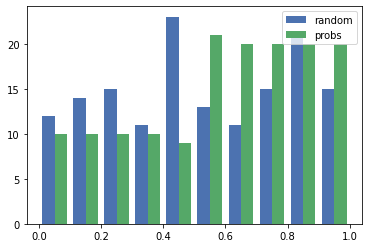

In [182]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
a = np.random.random(150)
b = probs
_ = plt.hist([a, b], bins='auto',  label=['random', 'probs']) 
plt.legend(loc='upper right')
plt.show()

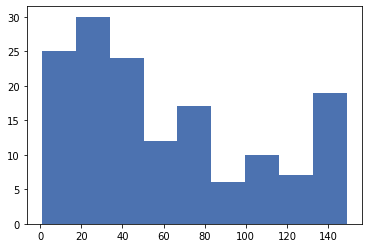

In [183]:
_ = plt.hist(index, bins='auto') 
plt.show()

### Bag of words

In [194]:
arr = np.random.randint(1,11,size=(6, 10))
print(arr)

#My solution
def rowwise_counts(arr):
  h_arr = np.full(arr.shape,np.arange(1,arr.shape[1]+1))
  result = []
  for i in range(arr.shape[0]):
    diff = np.setdiff1d(h_arr[i],arr[i])
    values, count = np.unique(arr[i], return_counts=True)
    for item in diff:
      count = np.insert(count,item-1,0)
    result.append(count)
  return np.array(result)
print(rowwise_counts(arr))

# Solution
def counts_of_all_values_rowwise(arr2d):
    # Unique values and its counts row wise
    num_counts_array = [np.unique(row, return_counts=True) for row in arr2d]
    # Counts of all values row wise
    return [[int(count[values==i]) if i in values else 0 for i in np.unique(arr2d)] for values, count in num_counts_array]

print(counts_of_all_values_rowwise(arr))

#performance check
arr = np.random.randint(1,11,size=(60, 100))
print(f'My Solution: {timeit.Timer(functools.partial(rowwise_counts, arr)).timeit(1)}')
print(f'Solution: {timeit.Timer(functools.partial(counts_of_all_values_rowwise, arr)).timeit(1)}')

[[ 3  8  1  8  5  1  1  1  9  7]
 [ 3 10  4  5  2  6  3  6  2  6]
 [ 2  8  6 10  7  8  8  6  1  4]
 [ 1 10  5  8  3  5  3 10  2  6]
 [10  1  4  3  1  5  3  3  8  6]
 [10  4  6  2  2  1 10  6 10  2]]
[[4 0 1 0 1 0 1 2 1 0]
 [0 2 2 1 1 3 0 0 0 1]
 [1 1 0 1 0 2 1 3 0 1]
 [1 1 2 0 2 1 0 1 0 2]
 [2 0 3 1 1 1 0 1 0 1]
 [1 3 0 1 0 2 0 0 0 3]]
[[4, 0, 1, 0, 1, 0, 1, 2, 1, 0], [0, 2, 2, 1, 1, 3, 0, 0, 0, 1], [1, 1, 0, 1, 0, 2, 1, 3, 0, 1], [1, 1, 2, 0, 2, 1, 0, 1, 0, 2], [2, 0, 3, 1, 1, 1, 0, 1, 0, 1], [1, 3, 0, 1, 0, 2, 0, 0, 0, 3]]
My Solution: 0.10934206800084212
Solution: 0.017738186001224676


### Softmax

In [195]:
#softmax. max subtraction adds numerical stability for huge numbers
sepallength = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0])
def softmax(x):
    """Compute softmax values for each sets of scores in x.
    https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
result = softmax(sepallength)
print(result)
print(np.sum(result))

[0.00221959 0.00181724 0.00148783 0.00134625 0.00200836 0.00299613
 0.00134625 0.00200836 0.00110221 0.00181724 0.00299613 0.00164431
 0.00164431 0.00099732 0.0044697  0.00404435 0.00299613 0.00221959
 0.00404435 0.00221959 0.00299613 0.00221959 0.00134625 0.00221959
 0.00164431 0.00200836 0.00200836 0.00245302 0.00245302 0.00148783
 0.00164431 0.00299613 0.00245302 0.00331123 0.00181724 0.00200836
 0.00331123 0.00181724 0.00110221 0.00221959 0.00200836 0.00121813
 0.00110221 0.00200836 0.00221959 0.00164431 0.00221959 0.00134625
 0.00271101 0.00200836 0.01483991 0.00814432 0.01342771 0.00331123
 0.00900086 0.00404435 0.00736928 0.00181724 0.00994749 0.00245302
 0.00200836 0.00493978 0.0054593  0.00603346 0.00365948 0.01099368
 0.00365948 0.0044697  0.006668   0.00365948 0.00493978 0.00603346
 0.00736928 0.00603346 0.00814432 0.00994749 0.01214989 0.01099368
 0.0054593  0.00404435 0.00331123 0.00331123 0.0044697  0.0054593
 0.00299613 0.0054593  0.01099368 0.00736928 0.00365948 0.00331

### One hot encoding

In [201]:
arr = np.random.randint(1,10, size=6)
print(arr)
print((arr[:, None] == np.unique(arr)).view(np.int8))


[2 4 4 8 5 1]
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]]


### Convert PIL image to numpy array

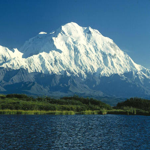

In [204]:
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
from io import BytesIO
import PIL, requests
from PIL import Image

# Import image from URL
response = requests.get(URL)

# Read it as Image
I = Image.open(BytesIO(response.content))

# Optionally resize
I = I.resize([150,150])

# Convert to numpy array
arr = np.asarray(I)

# Optionaly Convert it back to an image and show
im = PIL.Image.fromarray(np.uint8(arr))
im

### Euclidian distance between two arrays

In [205]:
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

#My solution
dist = np.sqrt(np.sum((a-b)**2))
print(dist)

#Solution
dist = np.linalg.norm(a-b)
print(dist)

#Performance check
a = np.random.uniform(10,100,(1000,1000))
b = np.random.uniform(10,100,(1000,1000))
%timeit np.sqrt(np.sum((a-b)**2))
%timeit np.linalg.norm(a-b)


6.708203932499369
6.708203932499369
100 loops, best of 3: 3.72 ms per loop
100 loops, best of 3: 3.63 ms per loop


### Sliding window

In [206]:
#My solution
def r_window(a, w=3):
  return np.vstack([np.roll(a,-step) for step in range(w)]).T[:a.size-w+1]
a = np.arange(0,10)
print(a)
print(r_window(a))


#Solution
# Author: Joe Kington / Erik Rigtorp
from numpy.lib import stride_tricks
def rolling(a, window=3):
    shape = (a.size - window + 1, window)
    strides = (a.itemsize, a.itemsize)
    return stride_tricks.as_strided(a, shape=shape, strides=strides)
Z = rolling(np.arange(10))
print(Z)


#Performance check
arr = np.random.choice(1000, 100000)
print(f'My Solution: {timeit.Timer(functools.partial(r_window, arr)).timeit(1)}')
print(f'Solution: {timeit.Timer(functools.partial(rolling, arr)).timeit(1)}')


[0 1 2 3 4 5 6 7 8 9]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
My Solution: 0.0018815639996319078
Solution: 6.0301998018985614e-05


### 2d subarray

In [208]:
#extra space for subarray padded with 'fill'
Z = np.random.randint(0,10,(10,10))
shape = (3,5)
fill  = 0
position = (9,1)
print(Z)

#Solution
# Author: Nicolas Rougier
def subarray_2d(Z, position, shape, fill=0):
  R = np.ones(shape, dtype=Z.dtype)*fill
  P  = np.array(list(position)).astype(int)
  Rs = np.array(list(R.shape)).astype(int)
  Zs = np.array(list(Z.shape)).astype(int)
  R_start = np.zeros((len(shape),)).astype(int)
  R_stop  = np.array(list(shape)).astype(int)
  Z_start = (P-Rs//2)
  Z_stop  = (P+Rs//2)+Rs%2
  R_start = (R_start - np.minimum(Z_start,0)).tolist()
  Z_start = (np.maximum(Z_start,0)).tolist()
  R_stop = np.maximum(R_start, (R_stop - np.maximum(Z_stop-Zs,0))).tolist()
  Z_stop = (np.minimum(Z_stop,Zs)).tolist()
  r = [slice(start,stop) for start,stop in zip(R_start,R_stop)]
  z = [slice(start,stop) for start,stop in zip(Z_start,Z_stop)]
  R[r] = Z[z]
  return R

print(subarray_2d(Z, position, shape))


[[6 5 6 6 0 0 9 0 4 3]
 [4 1 1 0 3 0 9 1 4 3]
 [9 4 4 4 9 7 9 6 0 9]
 [0 3 9 2 5 8 3 1 2 5]
 [4 0 1 8 0 9 1 3 9 1]
 [9 1 1 2 4 7 5 3 0 0]
 [9 2 0 8 9 5 7 6 0 4]
 [5 7 9 1 2 4 2 4 9 5]
 [0 8 6 8 7 3 7 3 6 9]
 [7 6 1 1 9 4 0 4 1 9]]
[[0 0 8 6 8]
 [0 7 6 1 1]
 [0 0 0 0 0]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


### List of 2d subarrays

In [209]:
#Total number of continuous 3X3 arrays inside major array

Z = np.random.randint(0,5,(10,10))
n = 3
i = Z.shape[0] - 1
j = Z.shape[1] - 1
print(Z)
#Solution based on previous function subbarray_2d
print(f'Total number of 3x3 matrixes: {len(np.r_[[subarray_2d(Z, (idx,idy), (3,3)) for idx in range(1,i) for idy in range(1,j)]])}')


# Author: Chris Barker
from numpy.lib import stride_tricks
i = 1 + (Z.shape[0]-3)
j = 1 + (Z.shape[1]-3)
C = stride_tricks.as_strided(Z, shape=(i,j, n, n), strides=Z.strides + Z.strides)
print(f'Total number of 3x3 matrixes: {len(C.reshape(64,3,3))}')

[[1 3 4 1 3 2 3 4 0 0]
 [2 4 0 3 2 1 2 3 1 4]
 [4 2 2 3 1 0 3 2 2 0]
 [2 2 2 1 1 1 0 4 2 2]
 [1 0 1 1 1 4 2 0 2 4]
 [0 4 3 0 3 3 1 2 0 0]
 [0 4 4 2 3 4 0 2 2 2]
 [1 3 1 0 1 4 2 2 3 0]
 [2 2 0 3 0 2 4 0 3 1]
 [1 3 2 2 4 1 0 2 1 4]]
Total number of 3x3 matrixes: 64
Total number of 3x3 matrixes: 64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


### Simmetric 2_d array

In [211]:
# Author: Eric O. Lebigot
# Note: only works for 2d array and value setting using indices
class Symetric(np.ndarray):
    def __setitem__(self, index, value):
        i,j = index
        super(Symetric, self).__setitem__((i,j), value)
        super(Symetric, self).__setitem__((j,i), value)
def symetric(Z):
    print(np.diag(Z.diagonal()))
    return np.asarray(Z + Z.T - np.diag(Z.diagonal())).view(Symetric)
Z = np.random.randint(0,10,(5,5)) 
print(Z)
S = symetric(Z)
S[2,3] = 42
print(S)

[[2 5 8 0 7]
 [3 1 2 2 4]
 [1 4 0 0 2]
 [1 6 0 0 8]
 [6 7 7 5 5]]
[[2 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 5]]
[[ 2  8  9  1 13]
 [ 8  1  6  8 11]
 [ 9  6  0 42  9]
 [ 1  8 42  0 13]
 [13 11  9 13  5]]


### Cartesian product

In [212]:
#Returns all possible combinations of array elements
# Author: Stefan Van der Walt
def cartesian(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)
    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T
    for n, arr in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]
    return ix
print(cartesian(([1, 2, 3], [4, 5], [6, 7])))

[[1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]
 [3 4 6]
 [3 4 7]
 [3 5 6]
 [3 5 7]]


### Check unequal values in rows of 2d array

In [213]:
Z = np.random.randint(0,2,(5,3))
print(Z)

#My solution 1
E = np.r_[[row for row in Z if np.any(np.diff(row) != np.zeros(Z.shape[1]-1))]]
print(E)

#My solution 2
result = Z[~np.all(np.diff(Z, axis=1) == np.zeros(Z.shape[1]-1), axis=1)]
print(result)

# Author: Robert Kern
# solution for arrays of all dtypes (including string arrays and record arrays)
E = np.all(Z[:,1:] == Z[:,:-1], axis=1)
U = Z[~E]
print(U)
# soluiton for numerical arrays only, will work for any number of columns in Z
U = Z[Z.max(axis=1) != Z.min(axis=1),:]
print(U)

np.random.seed(100)
Z = np.random.randint(0,2,(5,3))
%timeit np.r_[[row for row in Z if np.any(np.diff(row) != np.zeros(Z.shape[1]-1))]]
%timeit Z[~np.all(np.diff(Z, axis=1) == np.zeros(Z.shape[1]-1), axis=1)]
%timeit Z[~np.all(Z[:,1:] == Z[:,:-1], axis=1)]
%timeit Z[Z.max(axis=1) != Z.min(axis=1),:]

[[0 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]]
[[1 0 0]]
[[1 0 0]]
[[1 0 0]]
[[1 0 0]]
The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 72.4 µs per loop
The slowest run took 7.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.3 µs per loop
The slowest run took 9.43 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.15 µs per loop
The slowest run took 10.31 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.92 µs per loop


### Convert int array to binary matrix

In [215]:
# Author: Warren Weckesser
I = np.array([0, 1, 2, 3, 15, 16, 32, 64, 128])
print(I)
# & is perform biwise_and operation, the same result like: np.bitwise_and(I.reshape(-1,1),2**np.arange(8)))
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
print(B[:,::-1])
# Author: Daniel T. McDonald
I = np.array([0, 1, 2, 3, 15, 16, 32, 64, 128], dtype=np.uint8)
print(np.unpackbits(I[:, np.newaxis], axis=1))

[  0   1   2   3  15  16  32  64 128]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


### Einsum

Many other einsum operations: https://ajcr.net/Basic-guide-to-einsum/

In [216]:
np.random.seed(100)
A = np.random.uniform(1,4,5)
B = np.random.uniform(1,4,5)
print(A)
print(B)
#inner product (dot)
print(np.inner(A,B))
print(np.einsum('i,i', A, B))
#outer product (matrix)
print(np.outer(A,B))
print(np.einsum('i,j->ij', A,B))
#multiplication
print(np.multiply(A,B))
print(np.einsum('i,i->i', A, B))

[2.63021483 1.83510816 2.27355277 3.5343284  1.01415657]
[1.36470736 3.01224725 3.47755827 1.41011977 2.72527999]
24.771372217577305
24.77137221757731
[[ 3.58947354  7.92285739  9.14672531  3.70891792  7.16807183]
 [ 2.50438561  5.5277995   6.38169553  2.58772229  5.00118353]
 [ 3.10273421  6.8485031   7.90641223  3.20598171  6.19606787]
 [ 4.82332398 10.64627101 12.29083293  4.98382634  9.63203445]
 [ 1.38402694  3.05489034  3.52678856  1.43008223  2.7638606 ]]
[[ 3.58947354  7.92285739  9.14672531  3.70891792  7.16807183]
 [ 2.50438561  5.5277995   6.38169553  2.58772229  5.00118353]
 [ 3.10273421  6.8485031   7.90641223  3.20598171  6.19606787]
 [ 4.82332398 10.64627101 12.29083293  4.98382634  9.63203445]
 [ 1.38402694  3.05489034  3.52678856  1.43008223  2.7638606 ]]
[3.58947354 5.5277995  7.90641223 4.98382634 2.7638606 ]
[3.58947354 5.5277995  7.90641223 4.98382634 2.7638606 ]
